In [1]:
from network import *
import pickle

# Hyper Parameters
num_epochs = 12
batch_size = 100
learning_rate = 0.001

#CIFAR-10

train_dataset = dsets.CIFAR10(root = "./datasets/",train = True,transform = transforms.ToTensor(),download= True)
test_dataset = dsets.CIFAR10(root = "./datasets/",train = False,transform = transforms.ToTensor(),download= True)


#Data Loader

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size,shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size,shuffle = False)



cnn = CNN1()
#xavier initalize
nn.init.xavier_normal(cnn.conv1[0].weight)
# nn.init.xavier_normal(cnn.conv1[0].bias)
cnn.cuda()



criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(),lr = learning_rate)

train_acc_container,test_acc_container = trainning(
    net = cnn, 
    train_loader = train_loader,
    
    test_loader = test_loader, 
    criterion = criterion,
    optimizer = optimizer, 
    num_epochs = num_epochs,
)

with open("CNN1_result.dat","wb") as f:
    pickle.dump([train_acc_container,test_acc_container],f)
    print("CNN1 data save")

Files already downloaded and verified
Files already downloaded and verified
Epoch [1/12], Train: 36.8280 Test: 37.0400
Epoch [1/12], Train: 47.9460 Test: 48.3600
Epoch [1/12], Train: 53.2320 Test: 52.6600
Epoch [1/12], Train: 54.9240 Test: 54.3300
Epoch [1/12], Train: 59.4320 Test: 58.6400
Epoch [2/12], Train: 60.6140 Test: 58.9300
Epoch [2/12], Train: 65.5060 Test: 63.7200
Epoch [2/12], Train: 65.4940 Test: 62.9900
Epoch [2/12], Train: 66.6360 Test: 63.5700
Epoch [2/12], Train: 69.7660 Test: 67.1700
Epoch [3/12], Train: 70.8200 Test: 67.1300
Epoch [3/12], Train: 73.2560 Test: 68.6700
Epoch [3/12], Train: 75.6060 Test: 70.8000
Epoch [3/12], Train: 76.5840 Test: 71.0300
Epoch [3/12], Train: 77.6060 Test: 72.2700
Epoch [4/12], Train: 78.4760 Test: 71.8600
Epoch [4/12], Train: 79.2340 Test: 72.2500
Epoch [4/12], Train: 77.9060 Test: 70.9200
Epoch [4/12], Train: 81.1240 Test: 73.2000
Epoch [4/12], Train: 81.1120 Test: 73.3700
Epoch [5/12], Train: 82.2260 Test: 73.6800
Epoch [5/12], Train: 

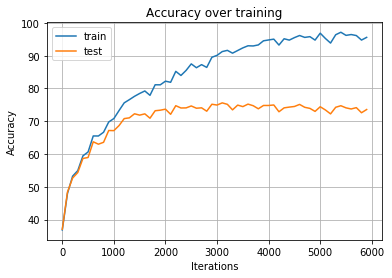

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.arange(len(train_acc_container))*100,np.array(train_acc_container))
plt.plot(np.arange(len(test_acc_container))*100,np.array(test_acc_container))
plt.legend(["train","test"])
plt.grid()
plt.title("Accuracy over training")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.savefig("CNN1.jpg")
plt.show()